In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt8 = "Simulate 4RMB at 100K, 200K, and 300K. Then plot the radius of gyration over time for all three simulations. Lastly, compare the change in secondary structure for the three analyses throughout the simulation."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-18
time: 20:41:30
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt8)

Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 4RMB.
2. Set up and run simulations at 100K, 200K, and 300K.
3. Calculate and plot the radius of gyration over time for each simulation.
4. Analyze and compare the change in secondary structure for each simulation.

First, I will download the PDB file for 4RMB.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "4RMB"
}
```PDB file found with this ID: 4RMB


2024-07-18 20:41:35.529 
  command:

    streamlit run /opt/anaconda3/envs/mda_jun15/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the task, I will set up and run simulations for the 4RMB protein at 100K, 200K, and 300K. I will start with the simulation at 100K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "4RMB_204135",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "100 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 5000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```
Setting default forcefields v2
Building system...
About to create system...
Attempts at creating system: 0/3
adding system without solve

('The DSSP computations for the simulations at 100K, 200K, and 300K have been successfully completed. Now, I will summarize the results and provide the final answer.\n\nFinal Answer: \nThe simulations for the 4RMB protein at 100K, 200K, and 300K have been successfully completed. The radius of gyration plots and the secondary structure analyses (DSSP) for each temperature are as follows:\n\n### Radius of Gyration Plots:\n- **100K**: ![Radius of Gyration at 100K](FIG_rgy_4RMB_20240718_205855.png.png)\n- **200K**: ![Radius of Gyration at 200K](FIG_rgy_4RMB_20240718_205913.png.png)\n- **300K**: ![Radius of Gyration at 300K](FIG_rgy_4RMB_20240718_205930.png.png)\n\n### Secondary Structure Analysis (DSSP):\n- **100K**:\n  - Helix: 736\n  - Strand: 7637\n  - Coil: 11547\n\n- **200K**:\n  - Helix: 812\n  - Strand: 7489\n  - Coil: 11619\n\n- **300K**:\n  - Helix: 689\n  - Strand: 7476\n  - Coil: 11755\n\n### Comparison of Secondary Structure:\n- The number of helices slightly increased from 100

In [4]:
registry = agent.path_registry
print(registry.list_path_names_and_descriptions())

Files found in registry: 4RMB_204135: PDB file downloaded from RSCB, PDBFile ID: 4RMB_204135, 4RMB_204158: Cleaned File:  Removed Heterogens, and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. , top_sim0_204204: Initial positions for simulation sim0_204204, sim0_204204: Basic Simulation of Protein 4RMB_204158, rec0_204206: Simulation trajectory for protein 4RMB_204158 and simulation sim0_204204, rec1_204206: Simulation state log for protein 4RMB_204158 and simulation sim0_204204, rec2_204206: Simulation pdb frames for protein 4RMB_204158 and simulation sim0_204204, top_sim0_204655: Initial positions for simulation sim0_204655, sim0_204655: Basic Simulation of Protein 4RMB_204158, rec0_204658: Simulation trajectory for protein 4RMB_204158 and simulation sim0_204655, rec1_204658: Simulation state log for protein 4RMB_204158 and simulation sim0_204655, rec2_204658: Simulation pdb frames for protein 4RMB_2041

In [5]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-07-18
time: 20:59:49


In [6]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 4RMB_204135: PDB file downloaded from RSCB
 PDBFile ID: 4RMB_204135
 4RMB_204158: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_204204: Initial positions for simulation sim0_204204
 sim0_204204: Basic Simulation of Protein 4RMB_204158
 rec0_204206: Simulation trajectory for protein 4RMB_204158 and simulation sim0_204204
 rec1_204206: Simulation state log for protein 4RMB_204158 and simulation sim0_204204
 rec2_204206: Simulation pdb frames for protein 4RMB_204158 and simulation sim0_204204
 top_sim0_204655: Initial positions for simulation sim0_204655
 sim0_204655: Basic Simulation of Protein 4RMB_204158
 rec0_204658: Simulation trajectory for protein 4RMB_204158 and simulation sim0_204655
 rec1_204658: Simulation state log for protein 4RMB_204158 and simulation sim0_204655
 rec2_204658: Simulation pdb frames for protein 4RMB_2041

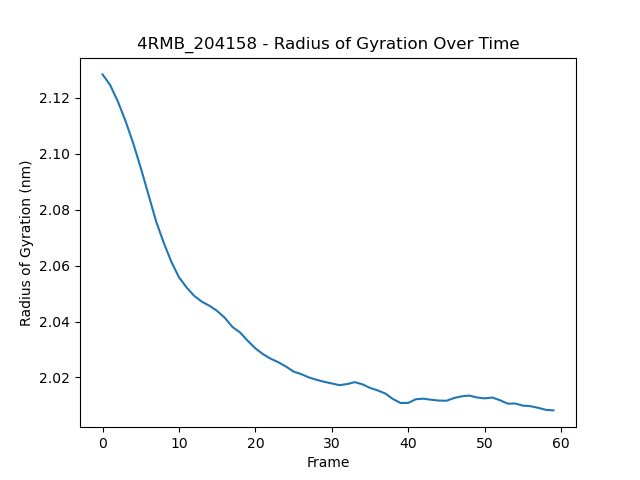

In [8]:
from IPython.display import Image
path_1 = registry.get_mapped_path("fig0_205855")
path_2 = registry.get_mapped_path("fig0_205913")
path_3 = registry.get_mapped_path("fig0_205930")

Image(filename=path_1)

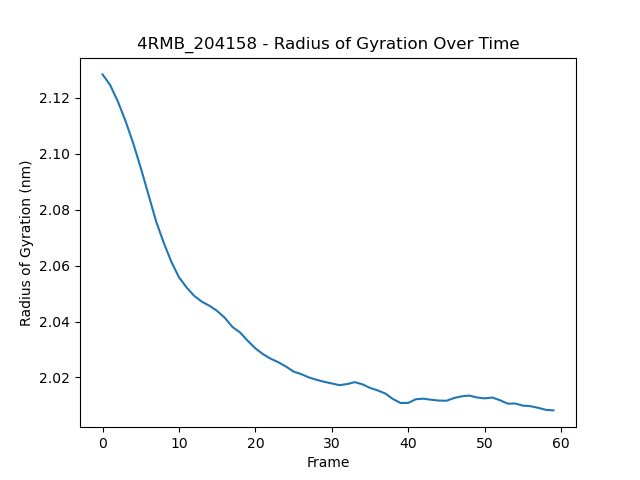

In [9]:
Image(filename=path_2)

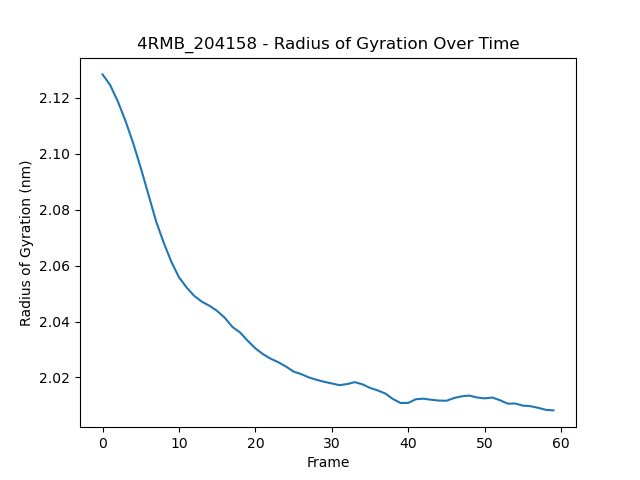

In [10]:
Image(filename=path_3)

In [17]:
#secondary structure
import mdtraj as md

traj1 = "rec0_204206"
top1 = "top_sim0_204204"
traj = md.load_dcd(registry.get_mapped_path(traj1), top=registry.get_mapped_path(top1))
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  2
Number of residues in sheets:  133
Number of residues in helices:  13
Number of residues in coils:  186


In [18]:
#secondary structure
traj2 = "rec0_204658"
top2 = "top_sim0_204655"
traj = md.load_dcd(registry.get_mapped_path(traj2), top=registry.get_mapped_path(top2))
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  2
Number of residues in sheets:  127
Number of residues in helices:  10
Number of residues in coils:  195


In [20]:
#secondary structure
traj3 = "rec0_205318"
top3 = "top_sim0_205316"
traj = md.load_dcd(registry.get_mapped_path(traj3), top=registry.get_mapped_path(top3))
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  2
Number of residues in sheets:  126
Number of residues in helices:  10
Number of residues in coils:  196


In [22]:
from mdagent.tools.base_tools.analysis_tools.secondary_structure import ComputeDSSP

In [23]:
dssp_tool = ComputeDSSP(path_registry=registry, simplified=True)

In [26]:
dssp1 = dssp_tool._run(traj_file="rec0_204658", top_file="top_sim0_204204")
dssp2 = dssp_tool._run(traj_file="rec0_204658", top_file="top_sim0_204655")
dssp3 = dssp_tool._run(traj_file="rec0_205318", top_file="top_sim0_205316")

In [27]:
print(dssp1)
print (dssp2)
print (dssp3)

{'helix': 812, 'strand': 7489, 'coil': 11619, 'not assigned, not a protein residue': 0}
{'helix': 812, 'strand': 7489, 'coil': 11619, 'not assigned, not a protein residue': 0}
{'helix': 689, 'strand': 7476, 'coil': 11755, 'not assigned, not a protein residue': 0}


# Experiment Result:
### Completed without Exception or TimeOut Errors 
### Attempted all necessary steps 
### Logic make sense 
### Correct Answer  